# <center> Метод переменных направлений

$$\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + b\frac{\partial u}{\partial y^2} + \sin x \sin y (\mu \cos\mu t +(a+b)\sin \mu t), a = 1, b = 1, \mu = 1$$

$$u(0,y,t) = 0; u(x,0,t) = 0; u(x,y,0) = 0$$

$$u_x(\pi,y,t) = -\sin y \sin \mu t;u_y(x,\pi,t) = -\sin x \sin \mu t $$

Схема:

$$\frac{u_{i,j}^{k+\frac{1}{2}} - u_{i,j}^k}{0.5\tau} = \frac{a}{h^2_1}(u^{k+\frac{1}{2}}_{i+1,j} - 2u_{i,j}^{k+\frac{1}{2}}+u_{i-1,j}^{k+\frac{1}{2}})+\frac{b}{h^2_2}(u^{k+\frac{1}{2}}_{i,j+1} - 2u_{i,j}^{k+\frac{1}{2}}+u_{i,j-1}^{k+\frac{1}{2}}) +f_{i,j}^{k+\frac{1}{2}}$$


$$u_{i,j}^{k+\frac{1}{2}} = u_{i,j}^k + 0.5\frac{a\tau}{h^2_1}(u^{k+\frac{1}{2}}_{i+1,j} - 2u_{i,j}^{k+\frac{1}{2}}+u_{i-1,j}^{k+\frac{1}{2}})+0.5\frac{b\tau}{h^2_2}(u^{k+\frac{1}{2}}_{i,j+1} - 2u_{i,j}^{k+\frac{1}{2}}+u_{i,j-1}^{k+\frac{1}{2}}) + 0.5\tau f_{i,j}^{k+\frac{1}{2}} $$ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from matplotlib import rcParams
rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma', 'Comic Sans MS', 'Courier', 'Shadow'
rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Times New Roman'

In [283]:
def phix0(y,t): return 0
def phiy0(x,t): return 0
def phit0(x,y): return 0
def phixl(y,t): return -m.sin(y)*m.sin(t)
def phiyl(x,t): return -m.sin(x)*m.sin(t)
def f(x,y,t): return m.sin(x)*m.sin(y)*(m.cos(t)+2*m.sin(t))

x0 = 0
xl = m.pi
y0 = 0
yl = m.pi
t0 = 0
tl = 2*m.pi


In [284]:
def Trid(abc,d):
    x = np.zeros(len(abc)); P = []; Q = []; a = [0]; b = []; c = []
    for i,value in enumerate(abc):
        b += [abc[i][i]]
        if i > 0:
            a += [abc[i][i-1]]
        if i < len(abc)-1:
            c +=[abc[i][i+1]]
        elif i == len(abc)-1:
            c += [0]
    P += [-c[0]/b[0]]
    Q += [d[0]/b[0]]
    for i in range(1,len(abc)):
        P += [-c[i]/(b[i]+a[i]*P[i-1])]
        Q += [(d[i] - a[i]*Q[i-1])/(b[i]+a[i]*P[i-1])]
    x[-1] = Q[-1]
    for j in range(len(abc)-2,-1,-1):
        x[j] = P[j]*x[j+1] + Q[j]
    b = np.array(b)
    a = np.array(a)
    P = np.array(P)
    minabc = np.max(np.abs(b+a*P))
    index = 0
    for i in range(1,len(abc)):
        if minabc > abs(b[i]+a[i]*P[i-1]) and (b[i]+a[i]*P[i-1]) < b[0]:
            minabc = abs(b[i]+a[i]*P[i-1])
            ndex = i
        elif abs(b[i]+a[i]*P[i-1]) > abs(b[0]):
            minabc = abs(b[0])
            ndex = 0
    minabs = np.min(np.abs(b+a*P))
    return x

In [285]:
def ADI(x0,xl,y0,yl,t0,tl,phix0,phiy0,phit0,phixl,phiyl,f,N,M):
    h1 = (xl-x0)/N
    h2 = (yl-y0)/N
    tau = (tl-t0)/M
    x = np.linspace(x0,xl,N)
    y = np.linspace(y0,yl,N)
    t = np.linspace(t0,tl,M)
    u = np.zeros((M,N,N), dtype = 'float64')
    u_x = np.zeros((M,N,N), dtype = 'float64')
    u_y = np.zeros((M,N,N), dtype = 'float64')
    for k in range(1,M):
        u_half = np.zeros((N,N), dtype = 'float64')
        for j in range(1,N-1):
            A = np.zeros((N,N), dtype = 'float64')
            d = np.zeros(N, dtype = 'float64')
            A[0,0] = 1
            A[-1,-2] = -1
            A[-1,-1] = 1
            d[-1] = h1*phixl(y[j],t[k])
            for i in range(1,N-1):
                A[i,i-1] = 0.5*tau/h1/h1
                A[i,i] = -(1+tau/h1/h1)
                A[i,i+1] = 0.5*tau/h1/h1
                d[i] = -(0.5*tau/h2/h2*(u[k-1][i][j-1] + u[k-1][i][j+1]) + (1-tau/h2/h2)*u[k-1][i][j] + 0.5*tau*f(x[i],y[j],t[k-1]+0.5*tau))
            u_half[::,j] = Trid(A,d)
        for i in range(1,N-1):
            A = np.zeros((N,N), dtype = 'float64')
            d = np.zeros(N, dtype = 'float64')
            A[0,0] = 1
            A[-1,-2] = -1
            A[-1,-1] = 1
            d[-1] = h2*phiyl(x[i],t[k])
            for j in range(1,N-1):
                A[j,j-1] = 0.5*tau/h2/h2
                A[j,j] = -(1+tau/h2/h2)
                A[j,j+1] = 0.5*tau/h2/h2
                d[j] = -(0.5*tau/h1/h1*(u_half[i-1][j] + u_half[i+1][j]) + (1-tau/h1/h1)*u_half[i][j] + 0.5*tau*f(x[i],y[j],t[k-1]+0.5*tau))
            u[k,i,::] = Trid(A,d)
    
    for i in range(N):
        for j in range(N):
            if j < N-1:
                u_y[::,i,j] = (u[::,i,j+1]-u[::,i,j])/h2
            else:
                u_y[::,i,j] = (u[::,i,j]-u[::,i,j-1])/h2
    for i in range(N):
        for j in range(N):
            if i< N-1:
                u_x[::,i,j] = (u[::,i+1,j]-u[::,i,j])/h1
            else:
                u_x[::,i,j] = (u[::,i,j]-u[::,i-1,j])/h1
    return {'u':u, 'x':x, 'y': y, 't': t, 'u_x':u_x,'u_y':u_y}

In [286]:
data = ADI(x0,xl,y0,yl,t0,tl,phix0,phiy0,phit0,phixl,phiyl,f,20,120)

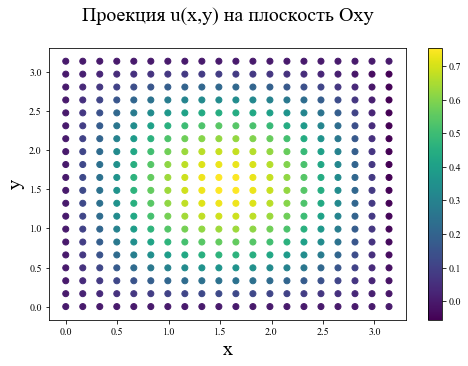

In [287]:
%matplotlib inline
from matplotlib import cm
x_arr,y_arr = np.meshgrid(data['x'],data['y'])
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
x_arr,t_arr = np.meshgrid(data['x'],data['y'])
cont = ax.scatter(x_arr,y_arr, c =  data['u'][40])
fig.colorbar(cont)
ax.set_title('Проекция u(x,y) на плоскость Oxy\n', size = 20)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('y', size = 20)
plt.show()

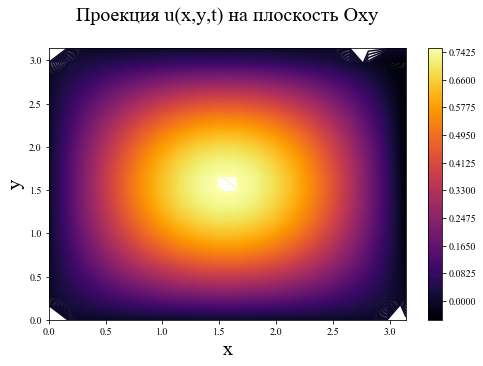

In [288]:
%matplotlib inline
from matplotlib import cm
x_arr,y_arr = np.meshgrid(data['x'],data['y'])
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
cont = ax.contour(x_arr,y_arr, data['u'][40], 550, cmap=cm.inferno)
fig.colorbar(cont)
ax.set_title('Проекция u(x,y,t) на плоскость Oxy\n', size = 20)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('y', size = 20)
plt.show()

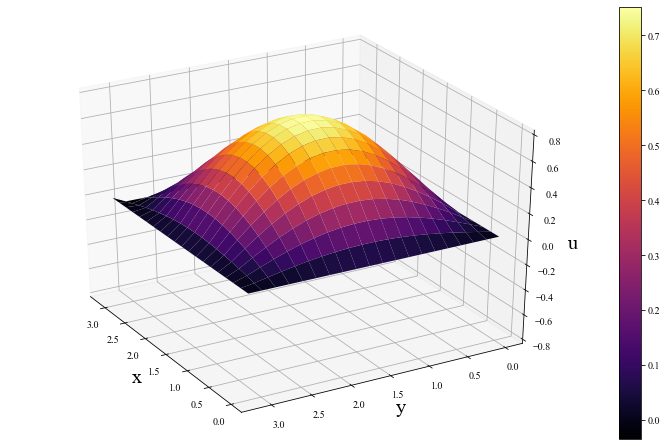

In [292]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,6))
x_arr,y_arr = np.meshgrid(data['x'],data['y'])
ax = Axes3D(fig)
surf = ax.plot_surface(x_arr,y_arr, data['u'][40], cmap=cm.inferno, rstride=1, cstride=1)
#ax.set_title('График поверхности u(x,t) \n', size = 25)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('y', size = 20)
ax.set_zlabel('u', size = 20)
ax.set_zlim3d([-0.8,0.8])
fig.colorbar(surf)
ax.view_init(30,150)
plt.draw()
plt.show()

```python
    y_arr,t_arr = np.meshgrid(data['y'],data['t'])
    z_arr = -np.sin(y_arr)*np.sin(t_arr)
    fig = plt.figure(figsize = (10,6))
    ax = Axes3D(fig)
    surf = ax.plot_surface(y_arr, t_arr, z_arr, cmap=cm.inferno, rstride=1, cstride=1)
    #ax.set_title('График поверхности u(x,t) \n', size = 25)
    ax.set_xlabel('y', size = 20)
    ax.set_ylabel('t', size = 20)
    ax.set_zlabel('$z$', size = 20)
    ax.view_init(30,-200)
    fig.colorbar(surf)
    plt.show()
```


y_arr,t_arr = np.meshgrid(data['y'],data['t'])
fig = plt.figure(figsize = (10,6))
ax = Axes3D(fig)
surf = ax.plot_surface(y_arr, t_arr, data['u_x'][::,-1,::], cmap=cm.inferno, rstride=1, cstride=1)
#ax.set_title('График поверхности u(x,t) \n', size = 25)
ax.set_xlabel('y', size = 20)
ax.set_ylabel('t', size = 20)
ax.set_zlabel('$u_x(x,y,t)$', size = 20)
ax.view_init(30,-200)
fig.colorbar(surf)
plt.show()


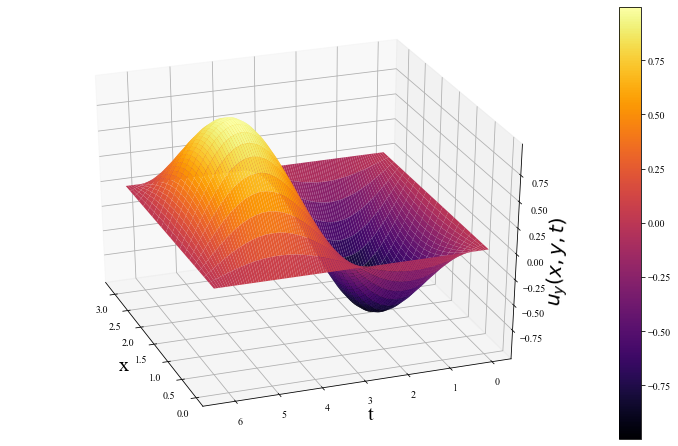

In [290]:
x_arr,t_arr = np.meshgrid(data['x'],data['t'])
fig = plt.figure(figsize = (10,6))
ax = Axes3D(fig)
surf = ax.plot_surface(x_arr, t_arr, data['u_y'][::,::,-1], cmap=cm.inferno, rstride=1, cstride=1)
#ax.set_title('График поверхности u(x,t) \n', size = 25)
ax.set_xlabel('x', size = 20)
ax.set_ylabel('t', size = 20)
ax.set_zlabel('$u_y(x,y,t)$', size = 20)
ax.view_init(30,-200)
fig.colorbar(surf)
plt.show()

In [281]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
names2 = []
x_arr,y_arr = np.meshgrid(data['x'],data['y'])
for k in range(120):
    fig = plt.figure(figsize = (10,8))
    ax = Axes3D(fig)
    surf = ax.plot_surface(x_arr,y_arr, data['u'][k], cmap=cm.inferno, rstride=1, cstride=1)
    #ax.set_title('График поверхности u(x,t) \n', size = 25)
    ax.set_xlabel('x', size = 20)
    ax.set_ylabel('y', size = 20)
    ax.set_zlabel('u', size = 20)
    ax.set_zlim3d([-0.8,0.8])
    #ax.text3D(4.,0.1,-0.0015,'t = '+str(round(data['t'][k],3)), size = 22)
    #fig.colorbar(surf, ticks = np.arange(-0.8,0.8,0.1))
    #ax.view_init(30,350)
    plt.draw()
    plt.savefig('/Users/haru4me/Downloads/alternating_directions/pic'+str(k)+'.png')
    names2 += ['/Users/haru4me/Downloads/alternating_directions/pic'+str(k)+'.png'] 
    plt.clf()

<ipython-input-281-4dc6accf34a9>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = (10,8))


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [293]:
import imageio
images = []
for filename in names2:
    images.append(imageio.imread(filename))
imageio.mimsave('/Users/haru4me/Downloads/alternating_directions/3d.gif', images)